## 蒙特卡洛

蒙特卡洛模拟是金融学和数值计算科学中最重要的算法之一，它在期权的定价和风险的管理上有很重要的作用，蒙特卡洛方法很容易处理高维度问题，在这种问题上复杂度和计算需求通常以线性方式增长．蒙特卡洛方法的缺点是：本身的高计算需求。

主要参考Black-Scholes-Merton(BSM)模型，在模型中到期的指数水平是一个随机变量，通过到期指数公式计算：

$S_T = S_0  exp((r - \frac{1}{2}\sigma^2)  T + \sigma\sqrt{T}z)$

其中z是一个服从标准正态分布的随机变量． 
蒙特卡洛算法的描述： 

１．生成 $I$ 个服从标准正态分布的随机数 $z_i, i=\{1,2,3,,,I\}$ , $I$为随机模拟的次数 

２．通过上面的到期指数计算公式，计算出所有模拟结果的到期指数 $S_T(i)$

３．计算到期期权的每一个模拟可能的内在价值 $h_T(i)$

$ h_T(i) = max(S_T(i) - K, 0)$

４．通过蒙特卡洛估算公式计算出期权现值

$C_0 \approx e^{-rT} \frac{1}{T} \sum_i^{I}h_T(i)$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 对计算要用到的一些数据进行初始化
S_0 = 100.0       # 股票的初始的指数水平
K = 105.0         # 看涨的行权价格
T = 1.0           # 到期的年限
r = 0.05          # 固定无风险利率
sigma = 0.2       # 固定波动率（收益的标准差）

In [11]:
I = 10000      # 随机数的个数，模拟计算到期指数的次数
z = np.random.standard_normal(I)
# 股票到期指数水平
S_T = S_0 * np.exp((r - 0.5 * sigma ** 2)* T + sigma * np.sqrt(T) * z)
# 期权的内在价值
h_T = np.maximum(S_T - K, 0)
# 期权现值
C = np.exp(-r * T)* np.sum(h_T)/I

In [15]:
print("the values is %.4f"%C)

the values is 7.8927


In [13]:
def draw_pic(position,y,label,plt):
    plt.subplot(position)
    plt.plot(y, label=label)
    plt.grid(True)
    plt.legend(loc=0)
    plt.ylabel(label)

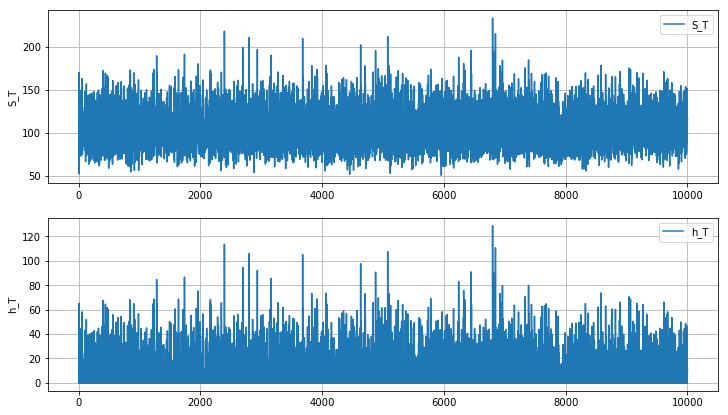

In [14]:
%matplotlib inline
plt.figure(figsize=(12,7))
draw_pic(211, S_T, 'S_T', plt)
draw_pic(212, h_T, 'h_T', plt)